In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data files
bach_data = pickle.load(open("out/bach_chorals/evolution/bach_chorals.pickle", "rb"))
shanxi_data = pickle.load(open("out/shanxi/evolution/shanxi.pickle", "rb"))

In [4]:
bach_counter = bach_data["note_counter"]
shanxi_counter = shanxi_data["note_counter"]

In [5]:
bach_matrix = bach_data["matrix"]  # average surprise over test set
shanxi_matrix = shanxi_data["matrix"]

In [6]:
bach_updates = bach_data["count_updates"]["pitch"]
shanxi_updates = shanxi_data["count_updates"]["pitch"]

In [7]:
print(f"Bach data shape: {bach_updates.shape}")
print(f"Shanxi data shape: {shanxi_updates.shape}")
print(f"Bach notes processed: {bach_counter[-1]}")
print(f"Shanxi notes processed: {shanxi_counter[-1]}")

Bach data shape: (162, 21)
Shanxi data shape: (217, 21)
Bach notes processed: 8062
Shanxi notes processed: 10182


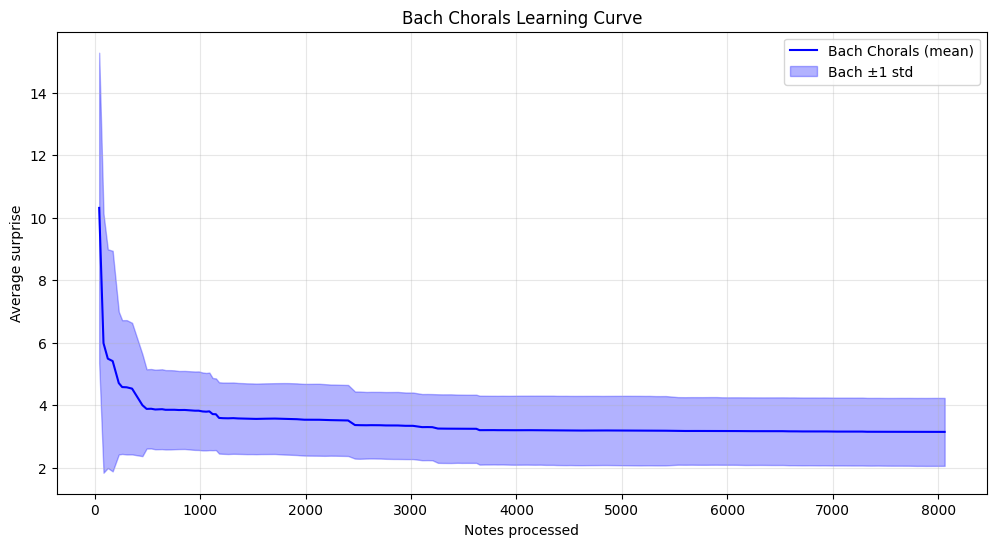

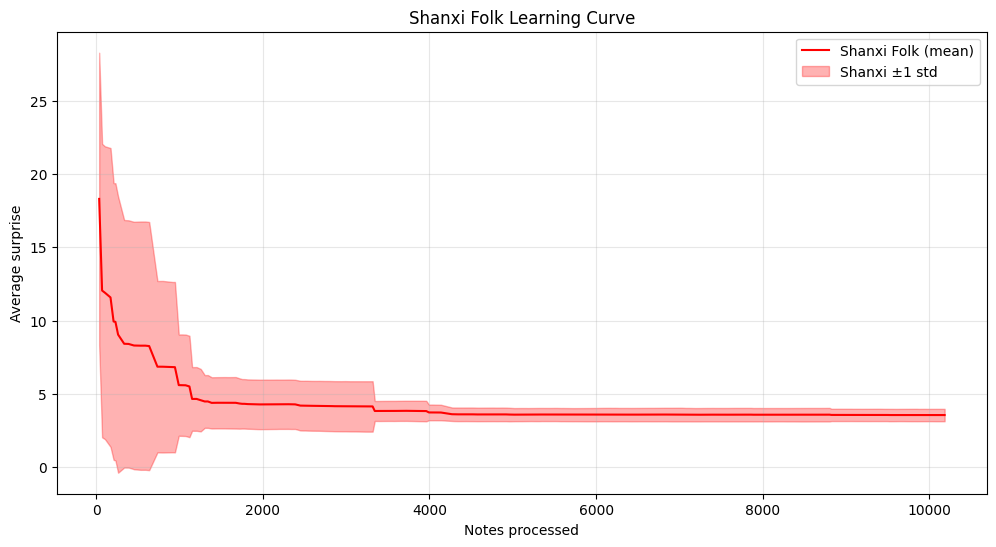

In [35]:
# Plot Bach surprises with variance
plt.figure(figsize=(12, 6))
bach_mean = np.mean(bach_matrix, axis=1)
bach_std = np.std(bach_matrix, axis=1)
plt.plot(bach_counter, bach_mean, label='Bach Chorals (mean)', color='blue')
plt.fill_between(bach_counter, bach_mean - bach_std, bach_mean + bach_std, 
                 alpha=0.3, color='blue', label='Bach ±1 std')
plt.xlabel("Notes processed")
plt.ylabel("Average surprise")
plt.title("Bach Chorals Learning Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot Shanxi surprises with variance
plt.figure(figsize=(12, 6))
shanxi_mean = np.mean(shanxi_matrix, axis=1)
shanxi_std = np.std(shanxi_matrix, axis=1)
plt.plot(shanxi_counter, shanxi_mean, label='Shanxi Folk (mean)', color='red')
plt.fill_between(shanxi_counter, shanxi_mean - shanxi_std, shanxi_mean + shanxi_std, 
                 alpha=0.3, color='red', label='Shanxi ±1 std')
plt.xlabel("Notes processed")
plt.ylabel("Average surprise")
plt.title("Shanxi Folk Learning Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

for each music piece, memorize the counts matrices of before and after training for each order
match the corresponding combination in each order
for each order, flatten before and after training using the same key (contexts x symbols)
calculate difference, then square, sum. squareroot.

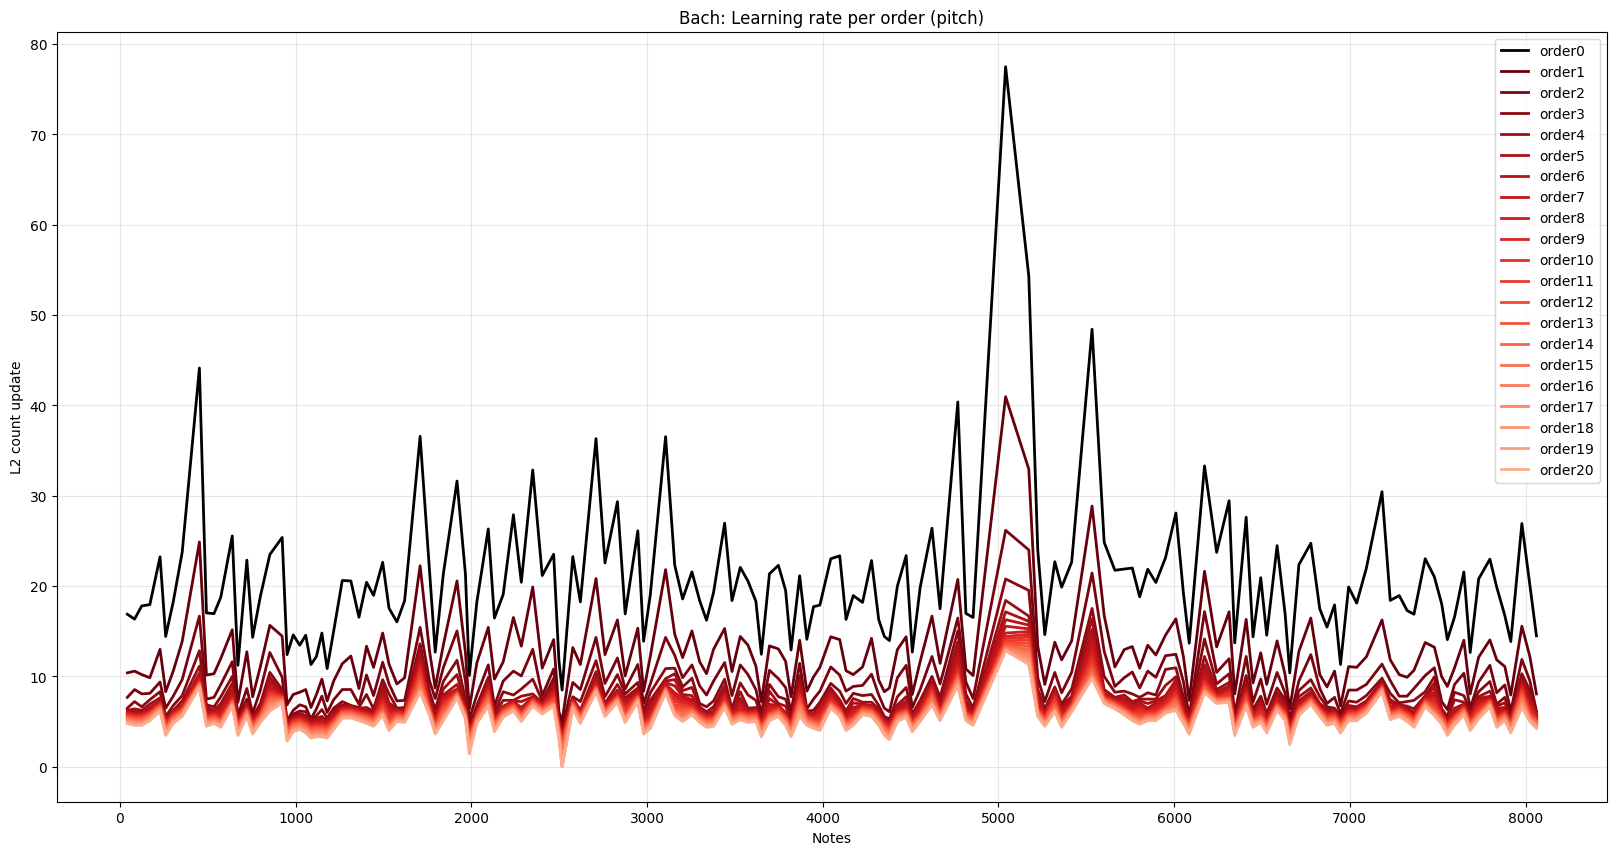

In [ ]:
plt.figure(figsize=(20, 10))
n_orders = bach_updates.shape[1]
colors = plt.cm.Reds(np.linspace(1.0, 0.3, n_orders-1))  # Dark to light blue spectrum for non-order0

# Plot order0 first
plt.plot(bach_counter, bach_updates[:,-1], label="order0", 
         color='black', linewidth=2)

# Then plot higher orders
for j in range(n_orders-1):
    label = f"order{j+1}"
    color = colors[j]
    
    plt.plot(bach_counter, bach_updates[:,j], label=label, 
             color=color, linewidth=2)

plt.xlabel("Notes")
plt.ylabel("L2 count update")
plt.title("New empty learned on Bach Chorals")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

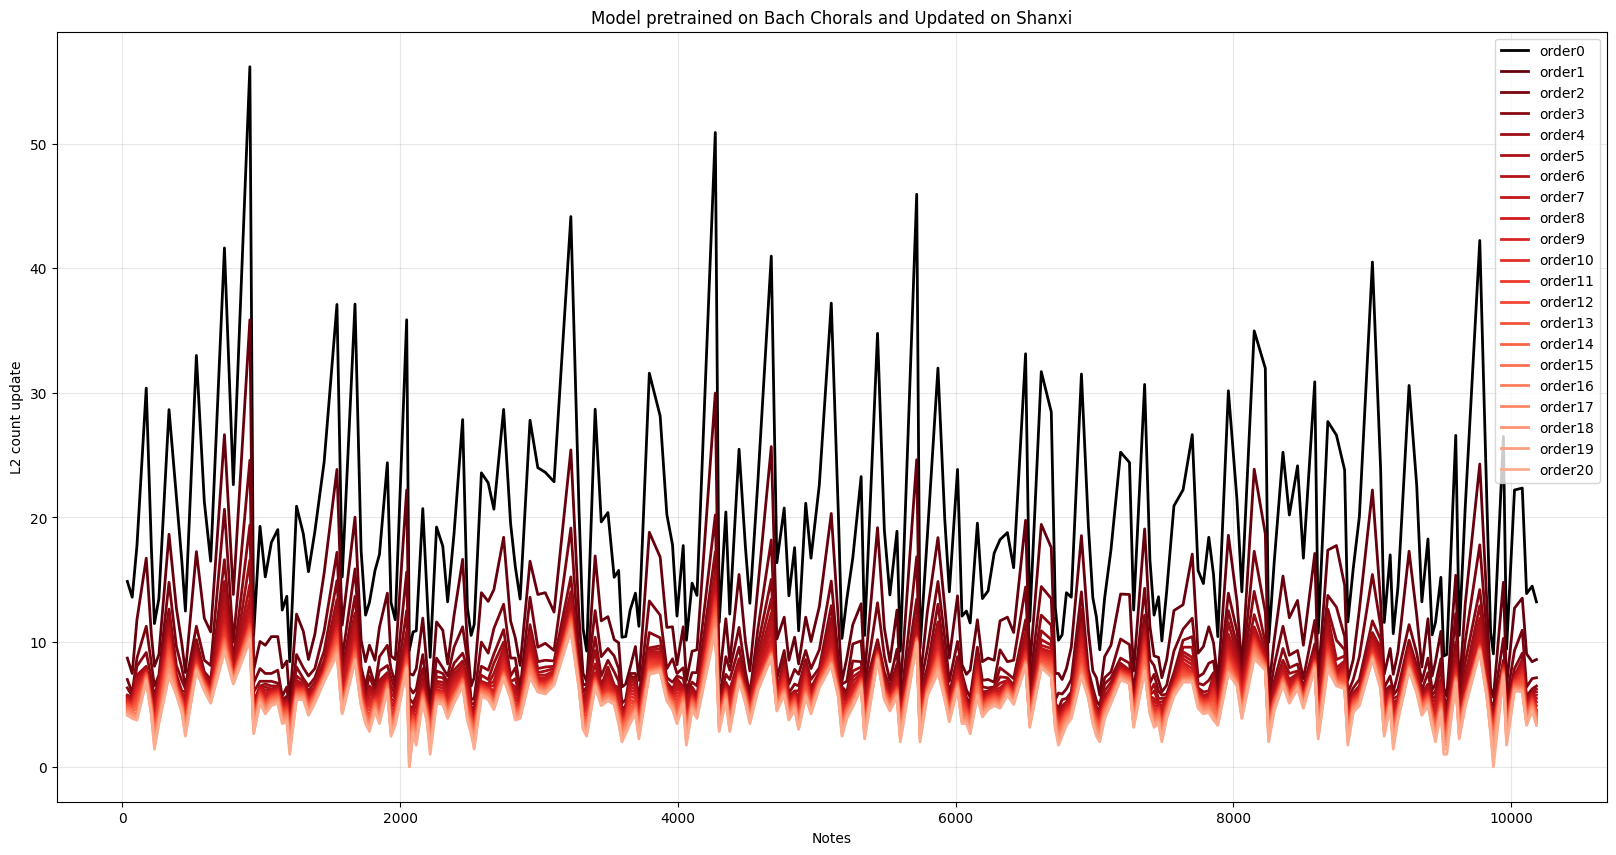

In [34]:
plt.figure(figsize=(20, 10))
n_orders = shanxi_updates.shape[1]
colors = plt.cm.Reds(np.linspace(1.0, 0.3, n_orders-1))  # Dark to light red spectrum for non-order0

# Plot order0 first
plt.plot(shanxi_counter, shanxi_updates[:,-1], label="order0", 
         color='black', linewidth=2)

# Then plot higher orders
for j in range(n_orders-1):
    label = f"order{j+1}"
    color = colors[j]
    
    plt.plot(shanxi_counter, shanxi_updates[:,j], label=label, 
             color=color, linewidth=2)

plt.xlabel("Notes")
plt.ylabel("L2 count update")
plt.title("Model pretrained on Bach Chorals and Updated on Shanxi")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



Final learning rates (last 100 steps average):
order1: Bach=12.7248, Shanxi=11.3861
order2: Bach=9.7210, Shanxi=8.7618
order3: Bach=8.2669, Shanxi=7.6632
order4: Bach=7.6387, Shanxi=7.1383
order5: Bach=7.3006, Shanxi=6.8445
order6: Bach=7.0714, Shanxi=6.6372
order7: Bach=6.8919, Shanxi=6.4577
order8: Bach=6.7323, Shanxi=6.2939
order9: Bach=6.5823, Shanxi=6.1376
order10: Bach=6.4491, Shanxi=5.9964
order11: Bach=6.3258, Shanxi=5.8656
order12: Bach=6.2114, Shanxi=5.7394
order13: Bach=6.1024, Shanxi=5.6122
order14: Bach=5.9929, Shanxi=5.4896
order15: Bach=5.8883, Shanxi=5.3670
order16: Bach=5.7852, Shanxi=5.2442
order17: Bach=5.6800, Shanxi=5.1203
order18: Bach=5.5757, Shanxi=4.9983
order19: Bach=5.4724, Shanxi=4.8710
order20: Bach=5.3678, Shanxi=4.7300
order0: Bach=21.1555, Shanxi=18.6586


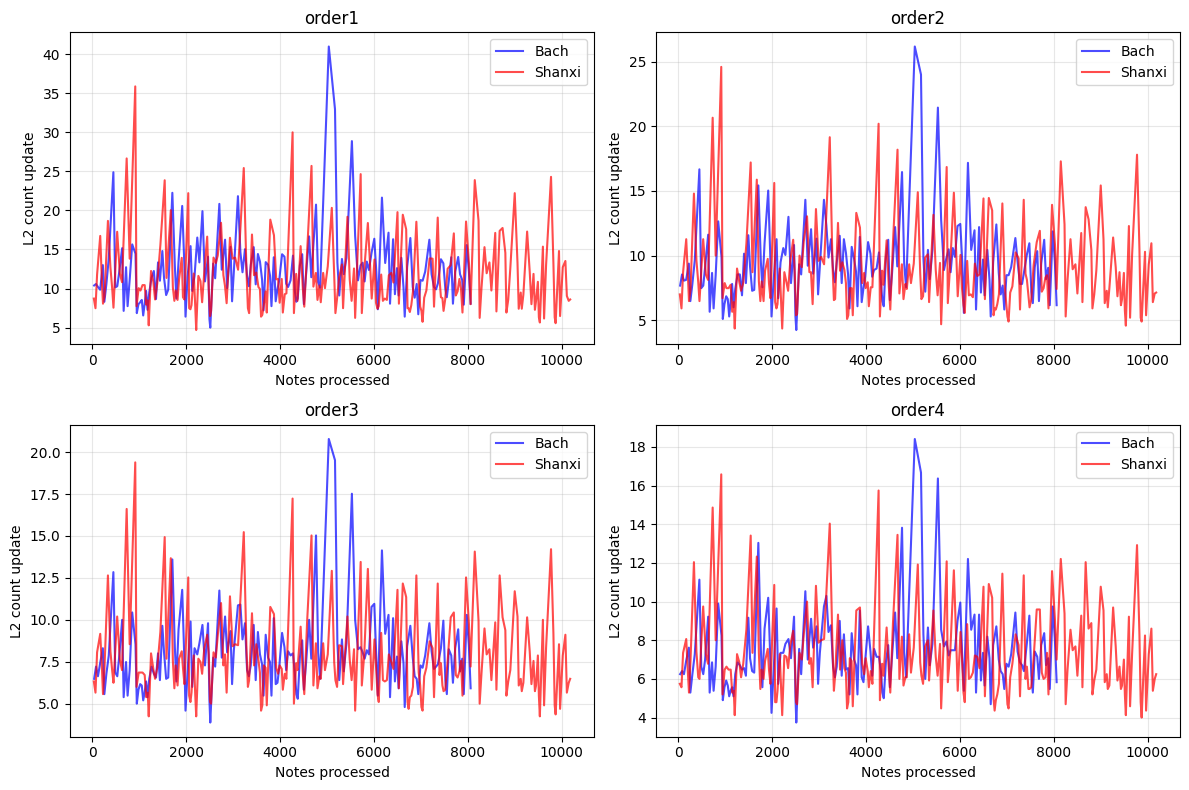

In [12]:
print("\nFinal learning rates (last 100 steps average):")
bach_final = np.mean(bach_updates[-100:], axis=0)
shanxi_final = np.mean(shanxi_updates[-100:], axis=0)

for j in range(len(bach_final)):
    order_name = f"order{j+1}" if j < len(bach_final)-1 else "order0"
    print(f"{order_name}: Bach={bach_final[j]:.4f}, Shanxi={shanxi_final[j]:.4f}")

# Plot comparison of learning rates over time
plt.figure(figsize=(12, 8))
orders_to_plot = min(4, bach_updates.shape[1])  # Plot up to 4 orders

for j in range(orders_to_plot):
    plt.subplot(2, 2, j+1)
    order_name = f"order{j+1}" if j < bach_updates.shape[1]-1 else "order0"
    
    plt.plot(bach_counter, bach_updates[:,j], label='Bach', color='blue', alpha=0.7)
    plt.plot(shanxi_counter, shanxi_updates[:,j], label='Shanxi', color='red', alpha=0.7)
    
    plt.xlabel("Notes processed")
    plt.ylabel("L2 count update")
    plt.title(f"{order_name}")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
